In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import missingno as msno
import sweetviz as sw
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandas_profiling import ProfileReport
%matplotlib inline

# Problem 1

## A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

In [2]:
df=pd.read_csv('Fever.csv')

In [3]:
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


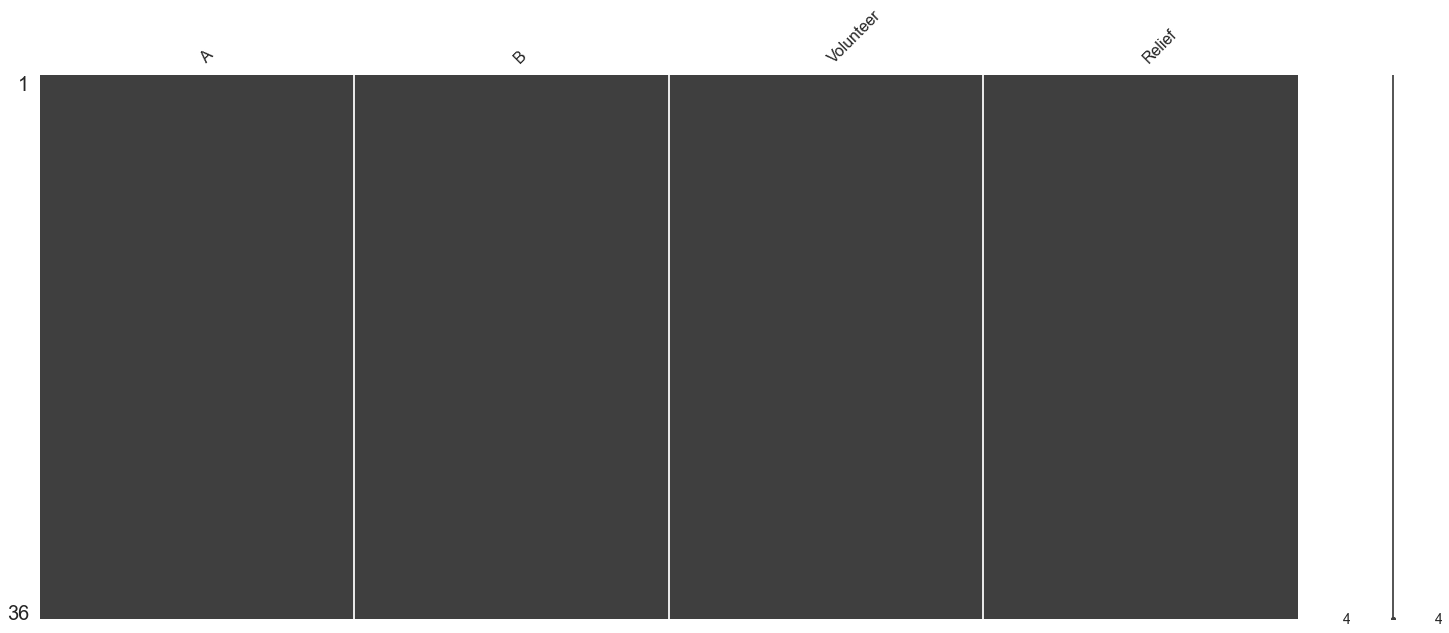

In [5]:
#Missing value check
msno.matrix(df)

In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [7]:
df.isna().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [8]:
df.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [10]:
my_report  = sw.analyze([df,'SweetViz_Report_Problem1'],target_feat='Relief')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [11]:
my_report.show_html('SweetViz_Report_Problem1.html')

In [2]:
IFrame(src='SweetViz_Report_Problem1.html', width=2000, height=600)

NameError: name 'IFrame' is not defined

## 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">   Answer
<a id='Answer'></a>
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Variable A
<a id='Var_A'></a>
      
    

<font color=darkblue> 
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound A (1,2,3) have no statistical significance.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
    
&nbsp;
    
* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound A (1,2,3) do have a statistical significance.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Variable B   
<a id='Var_B'></a>
<font color=darkblue> 
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound B (1,2,3) have no statistical significance.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
    
&nbsp;
    

* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound B (1,2,3) do have a statistical significance.
    <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">   Answer
<a id='Answer'></a>
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Variable A
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound A (1,2,3) have no effect on the relief variable.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
    
&nbsp;
    
    
* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound A (1,2,3) do have an effect on the relief variable
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>
    

In [13]:
formula = 'Relief ~ C(A)'
model = ols(formula,df).fit()
anova_tab = anova_lm(model)
anova_tab

df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

In [14]:
# Keeping alpha as 0.05
alpha = 0.05
#Condition for rejecting Null Hypothesis
anova_tab['PR(>F)'][0] < alpha

True

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Reject Null Hypothesis
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* Since p-value is less than alpha (0.05), we <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">reject</span> the null Hypothesis
* This means --> At least one of the means is not equal.
* This means --> Different levels of Compound A (1,2,3) <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">do have an effect</span> on the dependent variable relief.
    

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">   Answer
<a id='Answer'></a>
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Variable B
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound B (1,2,3) have no effect on the relief variable.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
    
&nbsp;
    
    
* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound B (1,2,3) do have an effect on the relief variable
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>
    

In [15]:
formula = 'Relief ~ C(B)'
model = ols(formula,df).fit()
anova_tab = anova_lm(model)
anova_tab

df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

In [16]:
# Keeping alpha as 0.05
alpha = 0.05
#Condition for rejecting Null Hypothesis
anova_tab['PR(>F)'][0] < alpha

True

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Reject Null Hypothesis
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* Since p-value is less than alpha (0.05), we <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">reject</span> the null Hypothesis
* This means --> At least one of the means is not equal.
* This means --> Different levels of Compound B (1,2,3) <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">do have an effect</span> on the dependent variable relief.
    

## 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
## What is an interaction between two treatments?
### [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

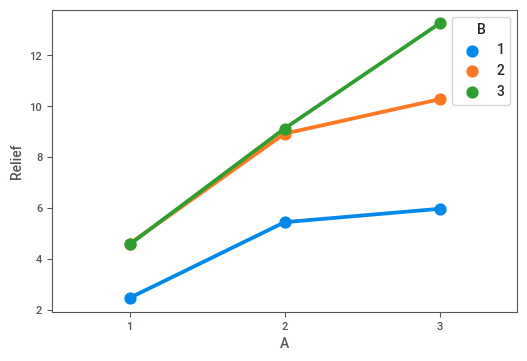

In [25]:
sns.pointplot(x='A',y='Relief',hue='B',data=df,ci=False)

In [17]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Explanation
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* We can see there is some interaction between Variable A and Variable B
* We can see the two lines (<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">Green</span> and <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF4500;">Orange</span>) intersect each other, <b><u>indicating Interaction between the two components.</b></i>
* There is statistically significant interaction between A and B
* Therefore the effect of Compound A is dependent on the value of Compound B and vice-versa.

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   What is an interaction between two treatments?
<a id='Var_A'></a>
    
    

<font color=darkblue> 
* In statistics, an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the effect of one causal variable on an outcome depends on the state of a second causal variable.
* If two variables of interest interact, the relationship between each of the interacting variables and a third "dependent variable" depends on the value of the other interacting variable.
* In our example since, since variables A & B interact, the relation between A and the relief variable depends on the value of variable B.
* Similarly, since variables A & B interact, the relation between B and the relief variable depends on the value of variable A.

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Hypothesis
<a id='Var_A'></a>
<font color=darkblue> 
* There are total 6 hypothesis here, 
    * 3 Null and 3 Alternate hypothesis.
    * 2 each for variable A & B, and 2 for the interaction between A & B.
    &nbsp;

    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   <u>Hypothesis for Variable A.</u>
&nbsp;
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound A (1,2,3) have no effect on the relief variable.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
&nbsp;
* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound A (1,2,3) do have an effect on the relief variable
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>
&nbsp;
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   <u>Hypothesis for Variable B.</u>
&nbsp;  
* Null Hypothesis (H0) --> All the means are equal --> i.e. Different levels of Compound B (1,2,3) have no effect on the relief variable.
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#008000;">
\begin{equation*}
\mu1 = \mu2 = \mu3
\end{equation*}
</span>
&nbsp;  
* Alternate Hypothesis (Ha) --> At least one of the means is not equal --> i.e. Different levels of Compound B (1,2,3) do have an effect on the relief variable
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#FF0000;">
\begin{equation*}
\mu1 \neq \mu2 \neq \mu3
\end{equation*}
</span>  
&nbsp;
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   <u>Hypothesis for Interaction between variable A & B.</u>
&nbsp;
* Null Hypothesis (H0) --> There is no interaction between variable A & B.
* Alternate Hypothesis (Ha) --> There is some interaction between variable A & B.
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   2-Way ANOVA with A & B without interaction

In [22]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   2-Way ANOVA, With interaction Effect of A & B

In [23]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Conclusion

<font color=darkblue> 
* <b>Based on the outcomes of the ANOVA tests performed above we can safely say that we are going to <u>reject all the null hypothesis and accept all three alternate hypothesis, since the p-value in each case is less than alpha (0.05)</u></b> i.e.
<br>
* Considering variable A independently, we can say it has a statistically significant impact on the relief variable.
<br>    
* Considering variable B independently, we can say it has a statistically significant impact on the relief variable.
<br>    
* Looking at ANOVA with interaction, we can say there is a statistically significant interaction between A & B.
    * Thus the relationship between A and relief variable depends on the value of the B variable.
    * and vice-versa.

## 1.6) Mention the business implications of performing ANOVA for this particular case study.

<font color=darkblue> 
* After performing ANOVA for this case study and looking at the results, we can infer below:  
&nbsp;    
    
    * Both Compounds A and B are independently critical to the relief given by the selected treatment.
    * However Compounds A and B interact with each other, that means the amount of relief for a given treatment will depend on the levels selected for A and B respectively.
    * Choosing different levels of compound A, will bear implications on the effect of compound B on the overall relief.
    * Similarly different levels of compound B, will bear implications on the effect of compound A on the overall relief.
    


# Problem 2

## The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [26]:
df2=pd.read_csv('Education_Post_12th_Standard.csv')

In [27]:
df2.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Missing Value Analysis

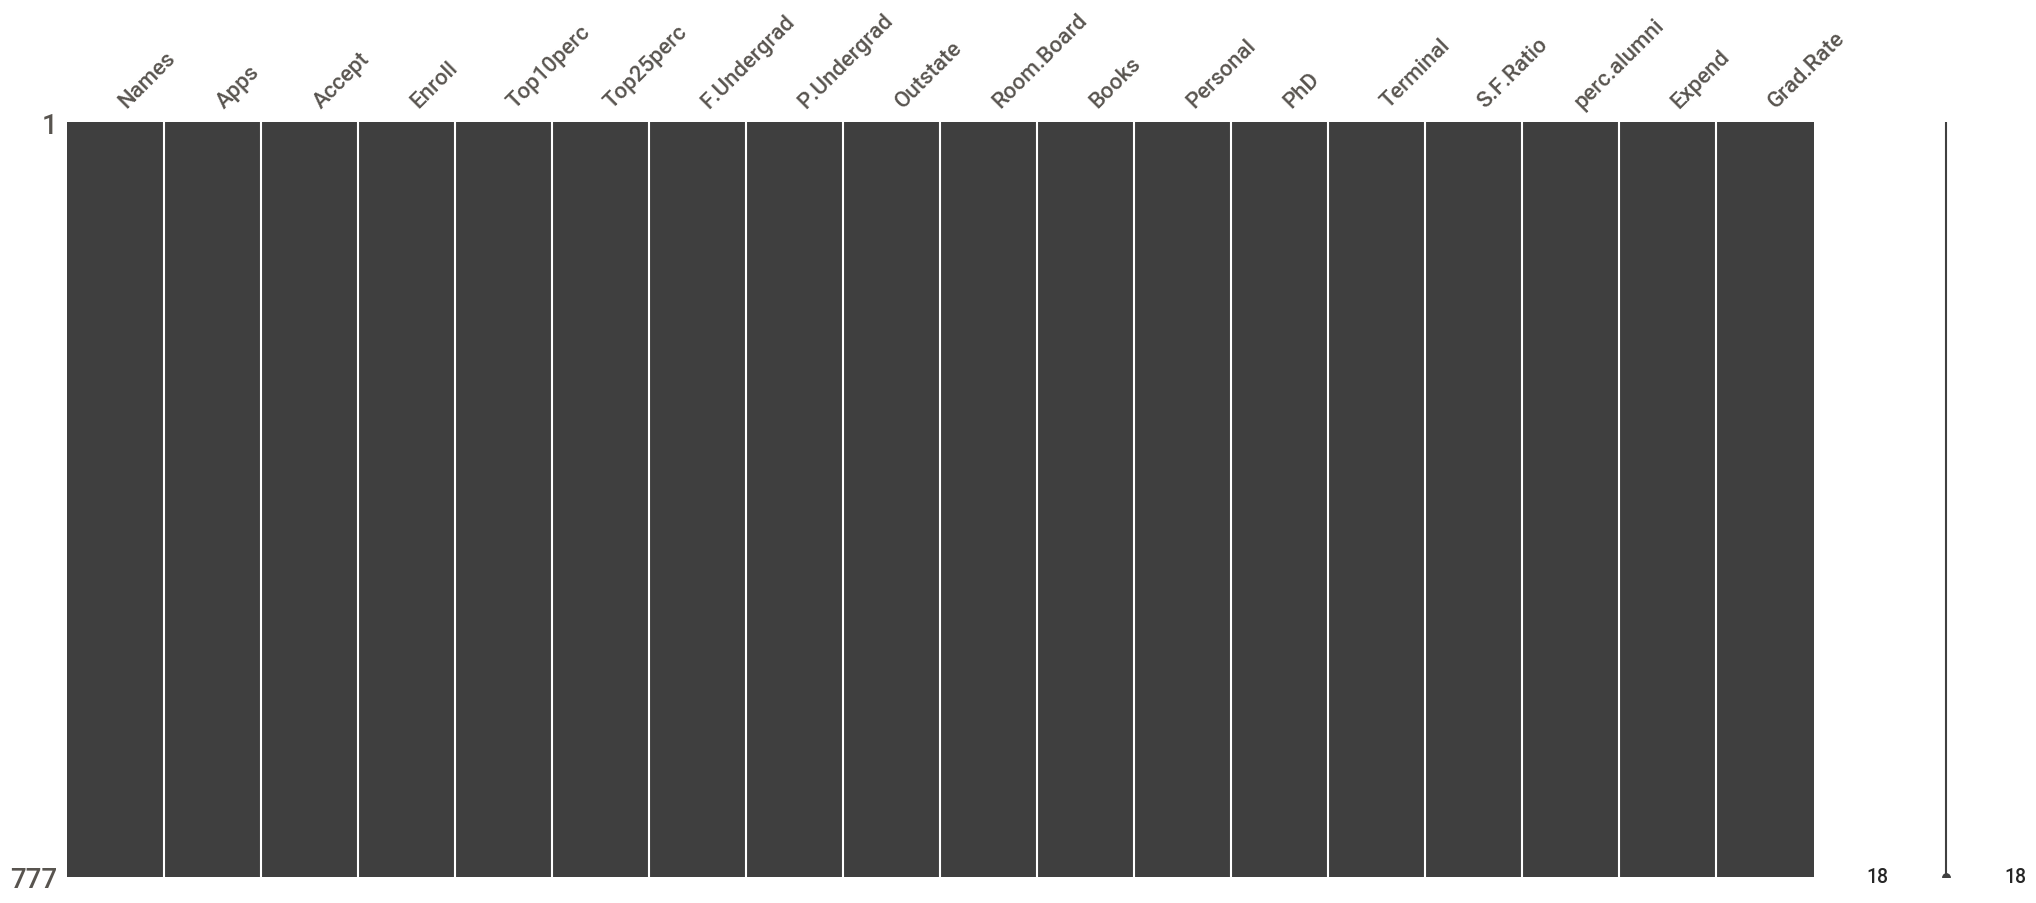

In [28]:
msno.matrix(df2)

In [29]:
df2.isnull().sum().sum()

0

In [30]:
df2.isna().sum().sum()

0

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   5 - point Summary

In [31]:
df2.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [46]:
df2.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S_F_Ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad_Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [33]:
df2.duplicated().sum()

0

In [34]:
# Modifying Column Names for easier usage in code
df2.columns=['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate']

In [48]:
df2.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Checking for skewness in data

In [54]:
import scipy.stats as stats
pd.DataFrame(stats.skew(df2.drop('Names',axis=1)),index=df2.columns.drop('Names'),columns=['Amount of Skewness'])

Amount of Skewness
Apps                   3.716557
Accept                 3.411126
Enroll                 2.685268
Top10perc              1.410487
Top25perc              0.258839
F_Undergrad            2.605416
P_Undergrad            5.681358
Outstate               0.508294
Room_Board             0.476434
Books                  3.478293
Personal               1.739131
PhD                   -0.766686
Terminal              -0.814965
S_F_Ratio              0.666146
perc_alumni            0.605719
Expend                 3.452640
Grad_Rate             -0.113558

<font color=darkblue> 
* <b>Looking at the skewness, we can make below conclusions.</b>
    * <b><u>Variables which are highly right skewed.</b></u>
        * Apps
        * Accept
        * Enroll
        * Top10perc
        * F_Undergrad
        * P_Undergrad
        * Books
        * Personal
        * Expend
    * <b><u>Variables that are slightly right skewed.</b></u>
        * Top25perc
        * Outstate
        * Room_Board
        * S_F_Ratio
        * perc_alumni
    * <b><u>Variables that are slightly left skewed. </b></u>
        * PhD
        * Terminal
        * Grad_Rate

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Univariate Analysis - Distplots

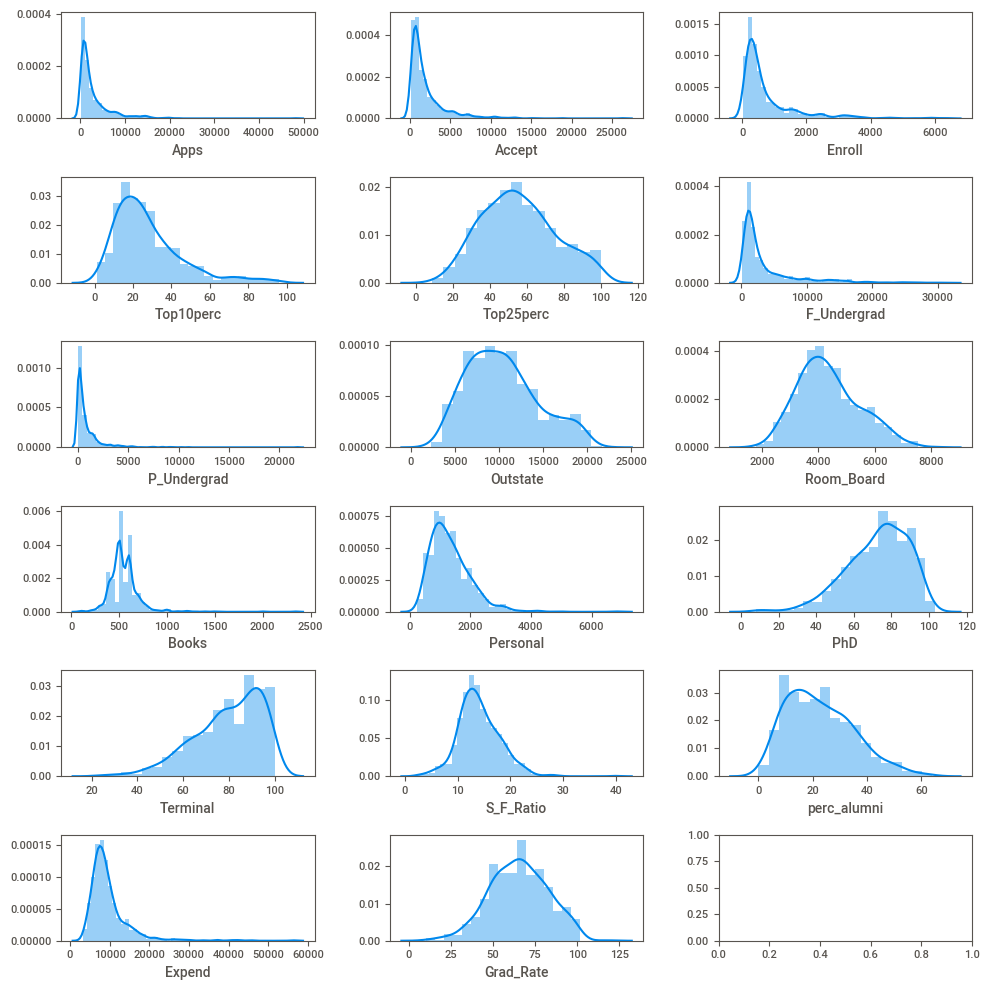

In [61]:
fig, axs = plt.subplots(6, 3,figsize=(10,10))
j=0
k=0
for i in df2.drop('Names',axis=1).columns:
    sns.distplot(df2[i],ax=axs[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
plt.show()

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Univariate Analysis - BoxPlot

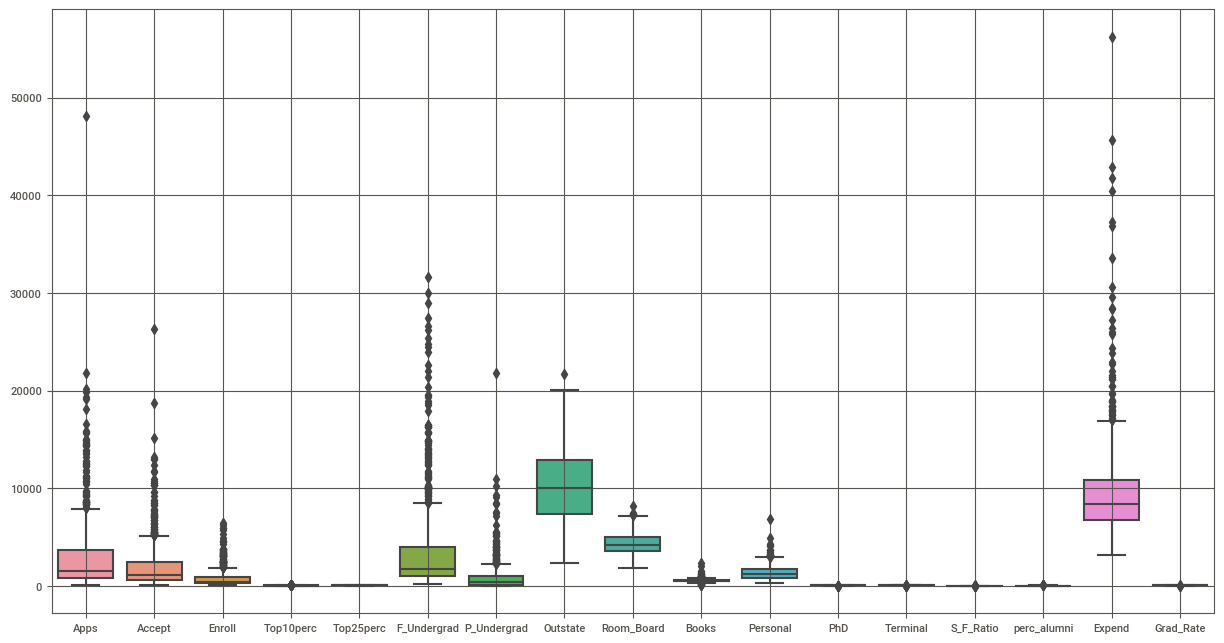

In [68]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df2, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Bivariate Analysis - PairPlot

<Figure size 1000x1000 with 0 Axes>

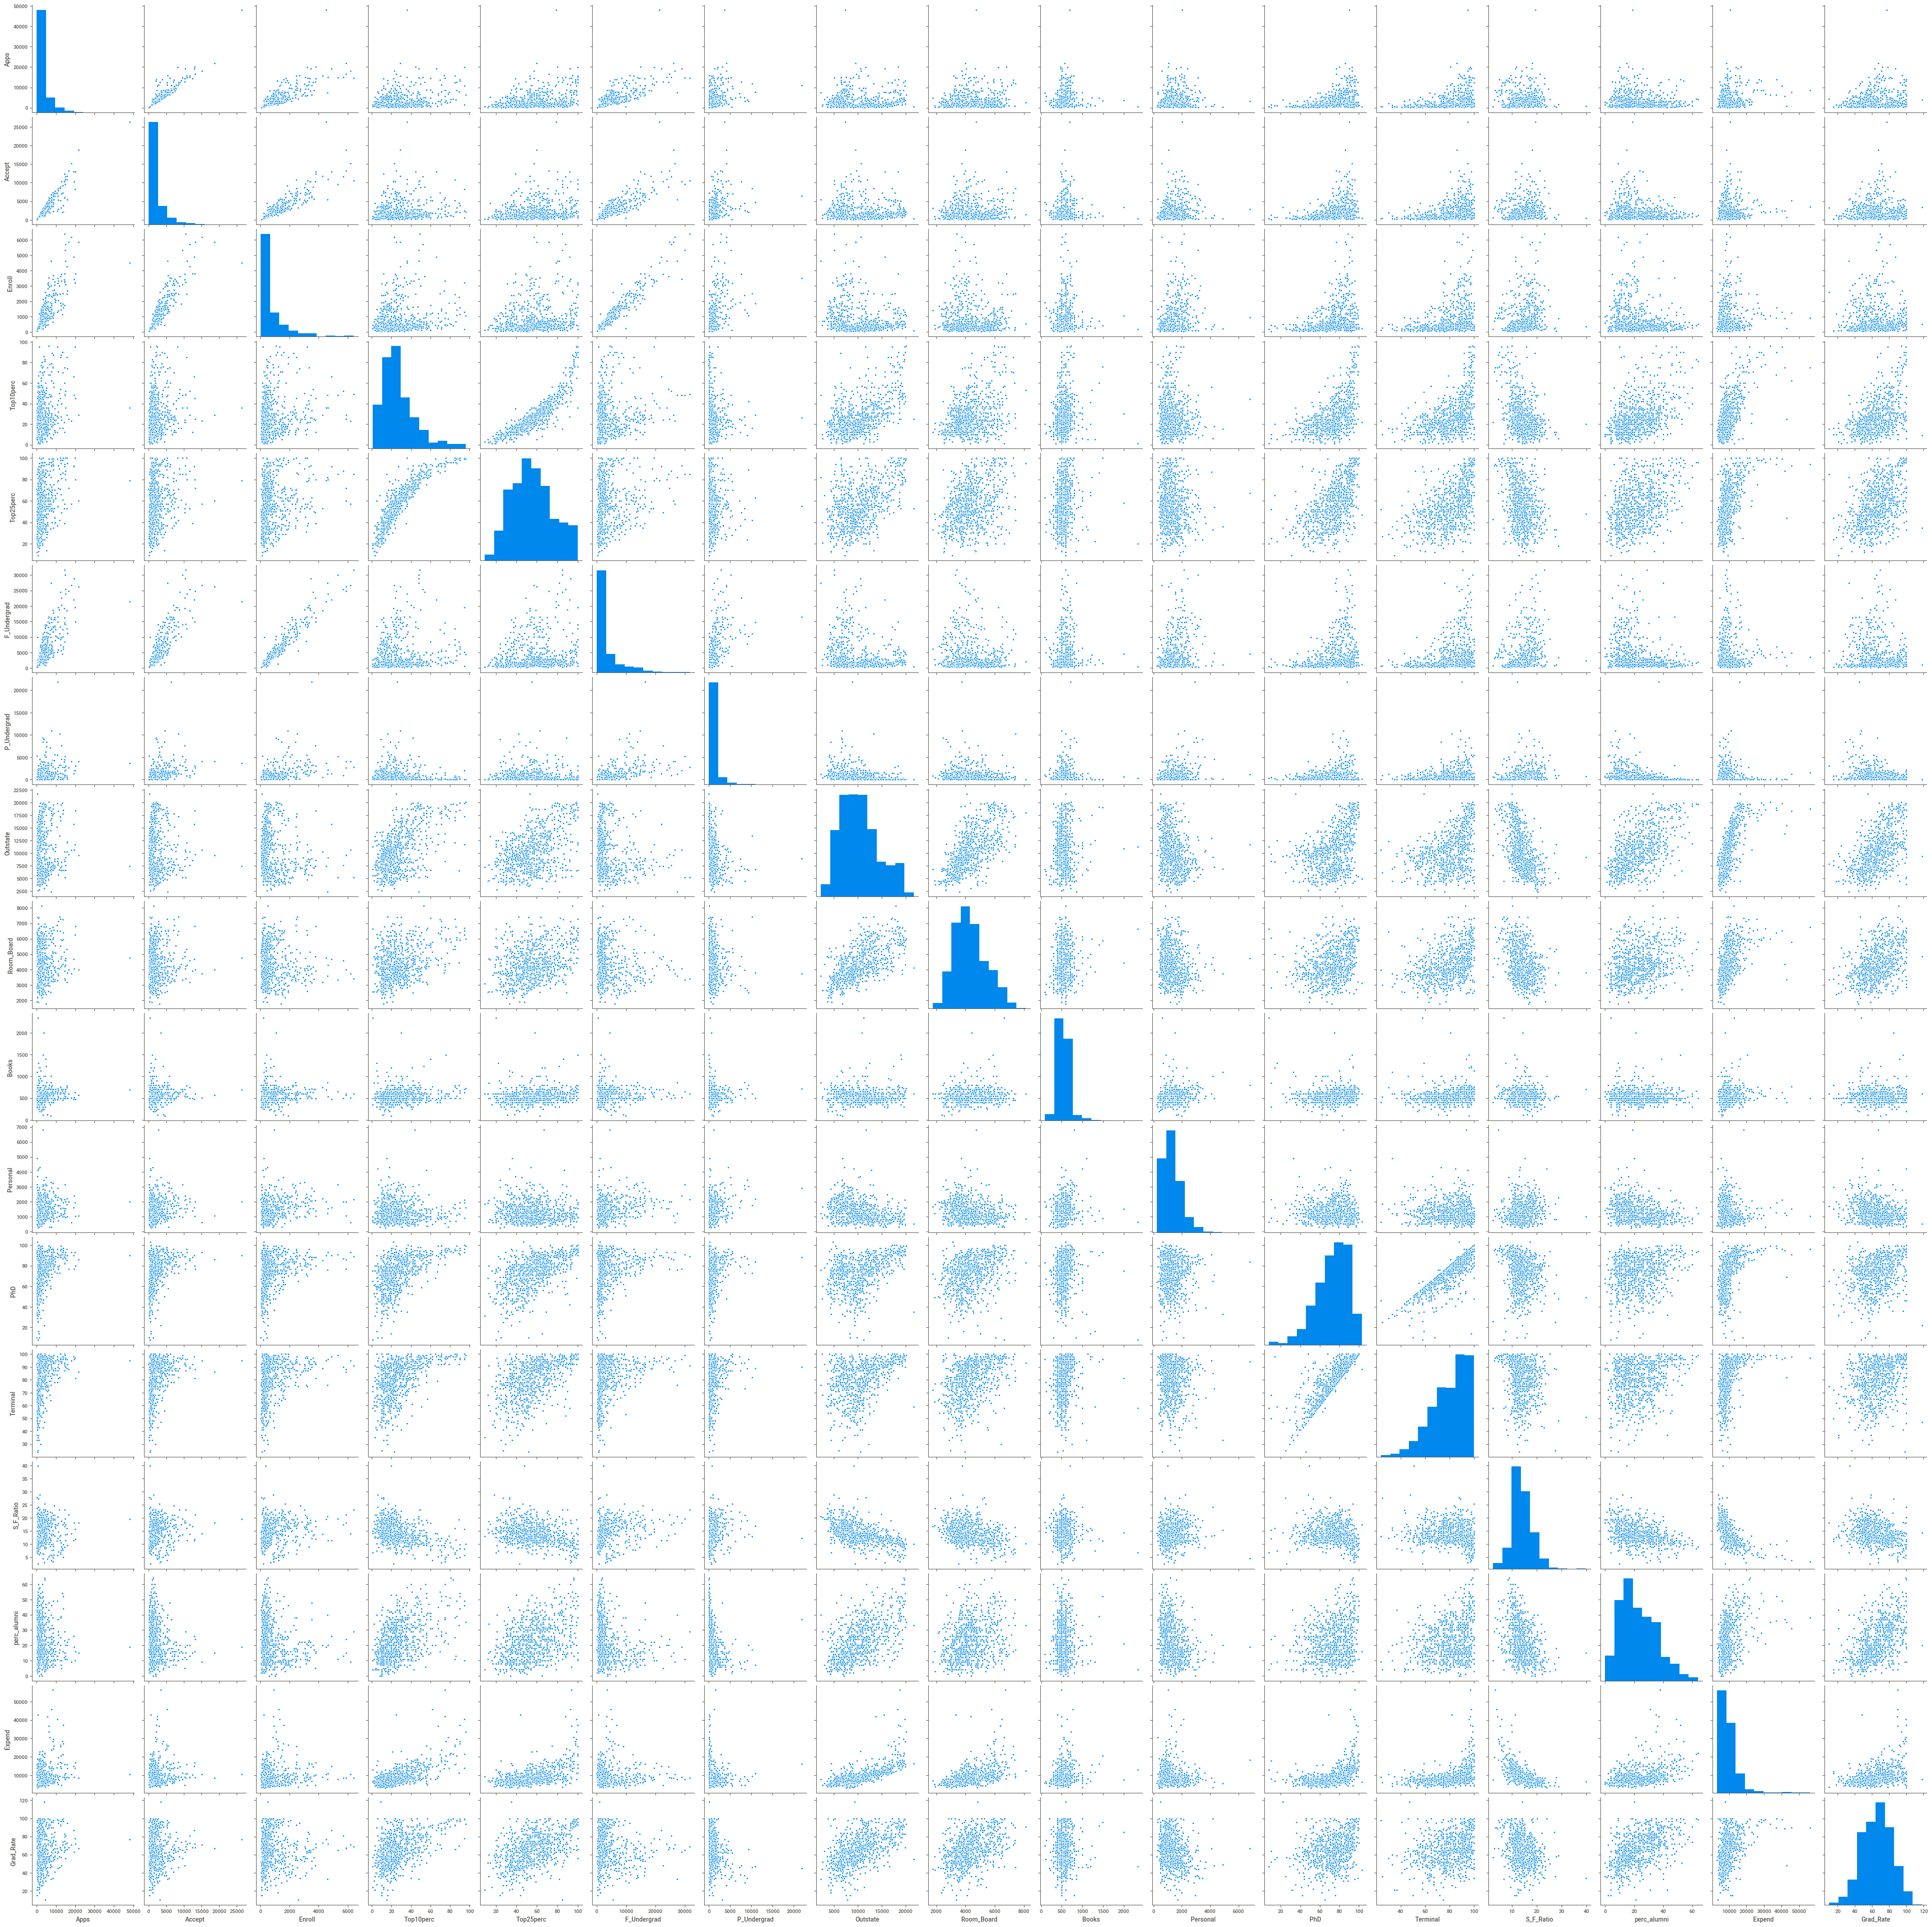

In [62]:
plt.figure(figsize=(10,10))
sns.pairplot(df2)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Bivariate Analysis - Grad_Rate Vs. Rest

In [38]:
my_report2  = sw.analyze([df2,'SweetViz_Report_Problem2'],target_feat='Grad_Rate')

:FEATURES DONE:                    |█████████████████████| [100%]   00:13  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [69]:
my_report2.show_html('SweetViz_Report_Problem2.html')

In [39]:
IFrame(src='SweetViz_Report_Problem2.html', width=2000, height=600)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Performing ANOVA to confirm the statistical significance of observations from above bivariate analysis

In [103]:
cols=['Top10perc','Top25perc','Outstate','Room_Board','PhD','Terminal','S_F_Ratio','perc_alumni']
dict={}
#cols=['Top10perc']
for i in cols:
    formula='Grad_Rate ~ {}'.format(i)
    model = ols(formula,df2).fit()
    anova_tab = anova_lm(model)
    alpha=0.05
    if anova_tab['PR(>F)'][0]<alpha:
        dict[i]=anova_tab['PR(>F)'][0]
dict
temp_df=pd.DataFrame(pd.Series(dict),index=cols,columns=['p-value'])
temp_df['Conclusion']='Statistically Significant'
temp_df

p-value                 Conclusion
Top10perc    2.897974e-49  Statistically Significant
Top25perc    1.872333e-45  Statistically Significant
Outstate     1.628927e-68  Statistically Significant
Room_Board   2.046793e-35  Statistically Significant
PhD          3.399450e-18  Statistically Significant
Terminal     1.803054e-16  Statistically Significant
S_F_Ratio    2.183394e-18  Statistically Significant
perc_alumni  2.303803e-48  Statistically Significant

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Bivariate Analysis - Correlation and HeatMap

In [104]:
df2.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F_Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P_Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room_Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S_F_Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc_alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad_Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F_Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P_Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room_Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S_F_Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc_alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad_Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S_F_Ratio  perc_alumni    Expend  Grad_Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F_Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P_Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room_Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S_F_Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc_alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

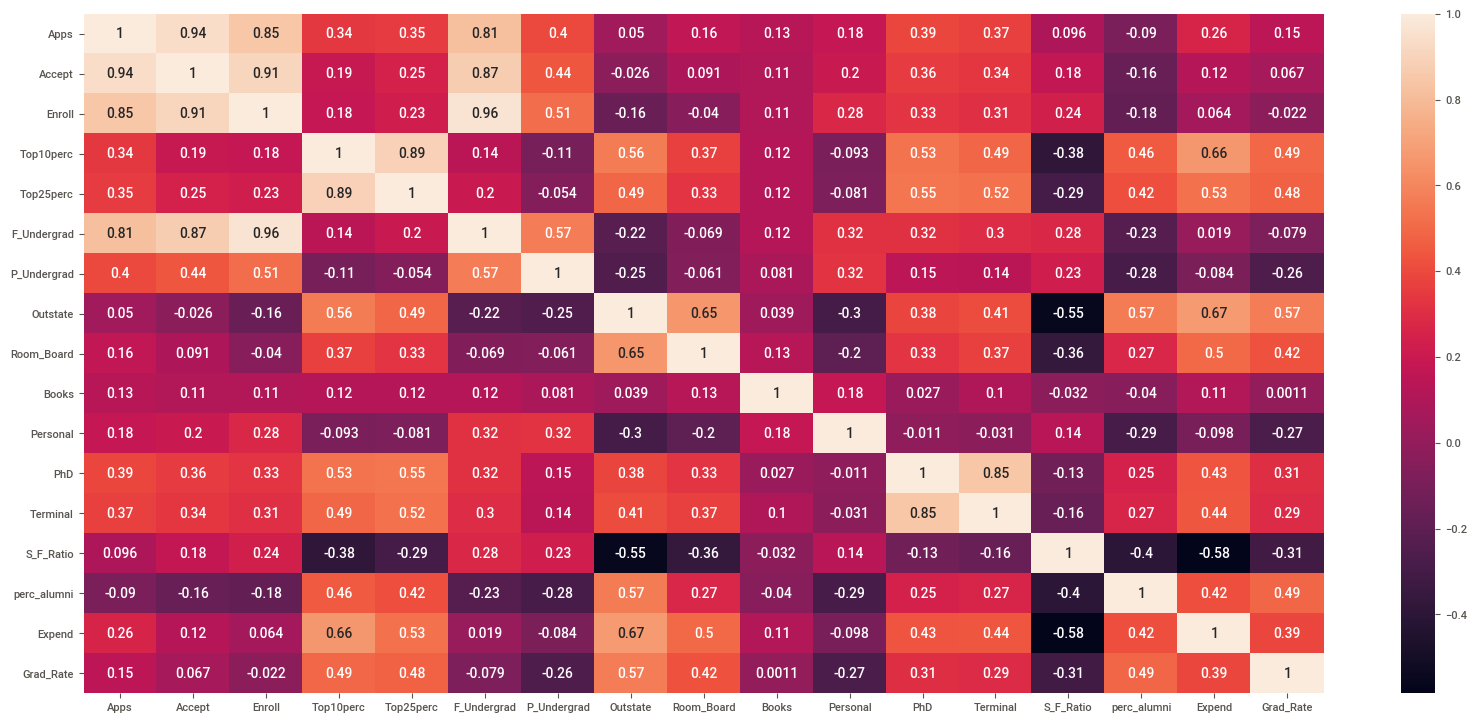

In [253]:
plt.figure(figsize=(20,9))
sns.heatmap(df2.corr(),annot=True)

<Figure size 2000x900 with 0 Axes>

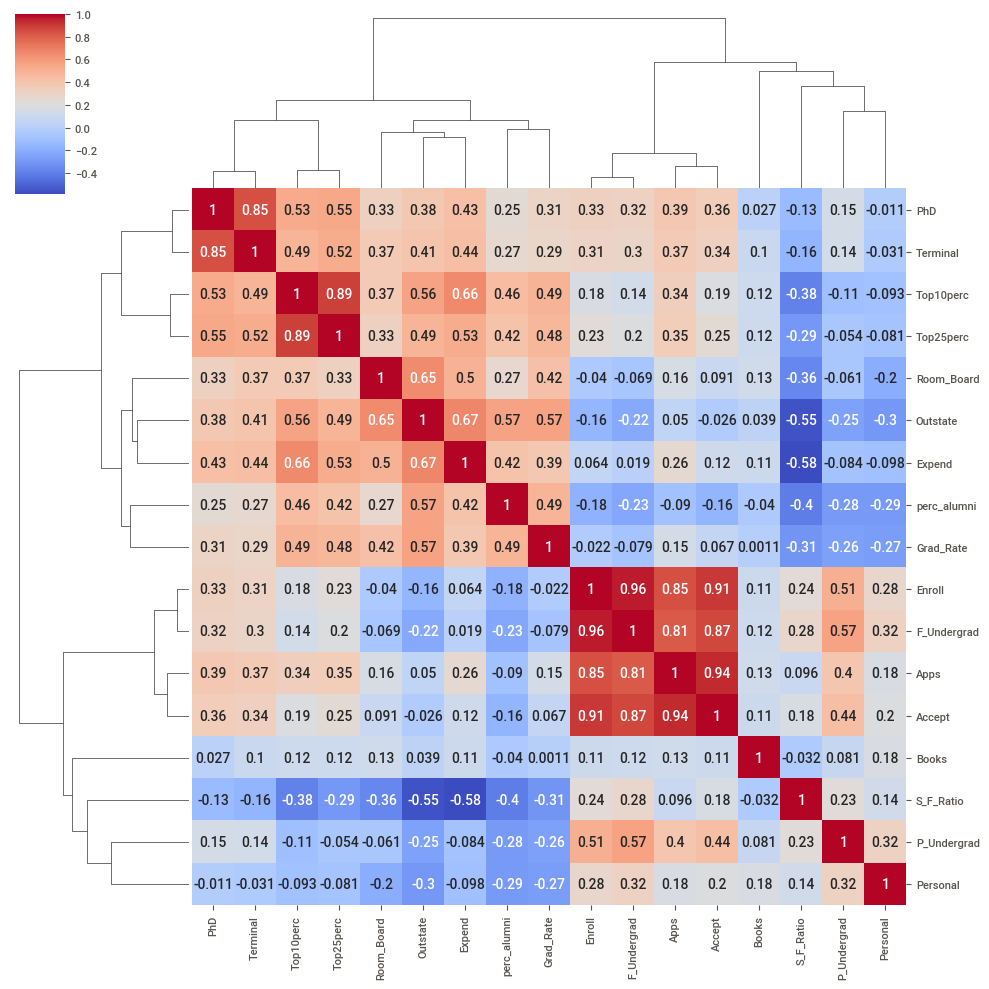

In [300]:
plt.figure(figsize=(20,9))
sns.clustermap(df2.corr(),cmap='coolwarm',annot=True)

## 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.



In [107]:
df2_with_outlier=df2

In [108]:
from scipy.stats import zscore
df2_with_outlier.drop('Names',axis=1,inplace=True)
data_new_with_outlier=df2_with_outlier.apply(zscore)
data_new_with_outlier.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S_F_Ratio  perc_alumni    Expend  Grad_Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [111]:
data_new_with_outlier.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   6.355797e-17  6.774575e-17 -5.249269e-17 -2.753232e-17 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

        F_Undergrad   P_Undergrad      Outstate    Room_Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.661405e-16 -3.029180e-17  6.515595e-17  3.570717e-16 -2.192583e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01 -5.615022e-01 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01 -4.997191e-01 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01 -3.301442e-01 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02  7.341765e-02  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00  1.378992e+01  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal     S_F_Ratio   perc_alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.765243e-17  5.954768e-17 -4.481615e-16 -2.057556e-17 -6.022638e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.962596e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.532948e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.433889e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.562224e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.859323e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend     Grad_Rate  
count  7.770000e+02  7.770000e+02  
mean   1.213101e-16  3.886495e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.230876e+00  
25%   -5.574826e-01 -7.260193e-01  
50%   -2.458933e-01 -2.698956e-02  
75%    2.241735e-01  7.302926e-01  
max    8.924721e+00  3.060392e+00

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Inference
    
    
<font color=darkblue>
    
* By using the standard scaler, we convert the data into the form where mean for each column is 0 and the standard deviation is 1.
    
* We scaled the data, since we could see from the original data set that there is a significant difference in the scale of different variables.
    
* E.g. PhD had a maximum value of 103, while the Expend variable had the maximum value of 56233.
    
* Also since there are number of outliers in the data, and we would want to preserve that information, we used standard scaler as it tries to preserve the outlier information in the trasnformed data.

## 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.



In [112]:
df2.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F_Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P_Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room_Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S_F_Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc_alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad_Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F_Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P_Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room_Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S_F_Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc_alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad_Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S_F_Ratio  perc_alumni    Expend  Grad_Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F_Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P_Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room_Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S_F_Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc_alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [120]:
cov_matrix = np.cov(data_new_with_outlier.T)
pd.DataFrame(cov_matrix,columns=df2.columns,index=df2.columns)

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F_Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P_Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room_Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S_F_Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc_alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad_Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F_Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P_Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room_Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S_F_Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc_alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad_Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S_F_Ratio  perc_alumni    Expend  Grad_Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F_Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P_Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room_Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S_F_Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc_alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Inference
    
    
<font color=darkblue>
    
* Looking at the above two matrices, we can say that the covariance matrix of the standardized data is the same as the correlation matrix of the original data.

* In Pseudo code, we can say:
    * cov_matrix(scaled_data) = orginal_data.corr()


## 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.



## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Outliers Before Scaling

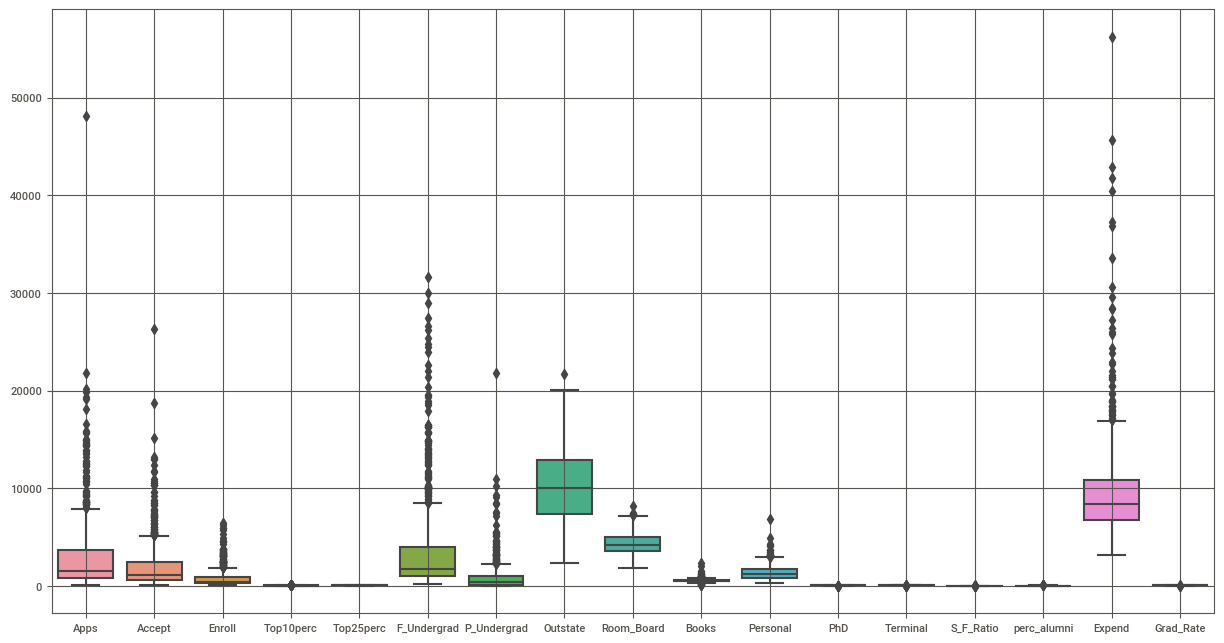

In [122]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df2, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Outliers After Scaling

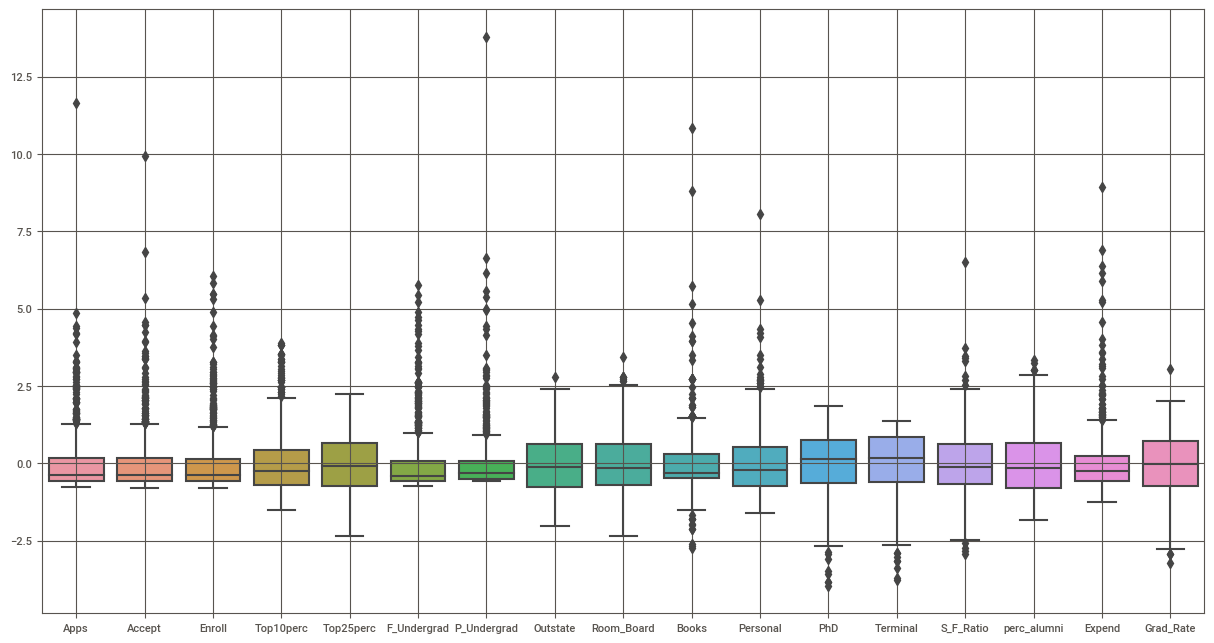

In [123]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=data_new_with_outlier, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Random check if data has changed after scaling

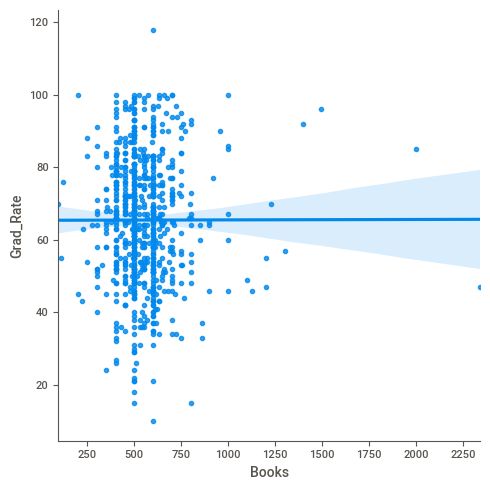

In [304]:
sns.lmplot(x='Books',y='Grad_Rate',data=df2)

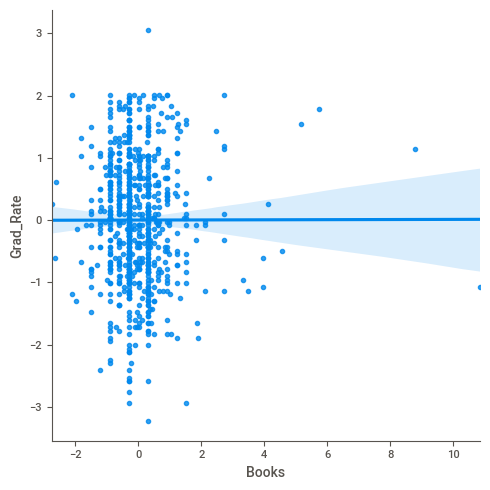

In [305]:
sns.lmplot(x='Books',y='Grad_Rate',data=data_new_with_outlier)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Percentage of Outlier in each column before scaling

In [124]:
dict={}
for i in df2.columns:
    q1,q3=np.percentile(df2[i],[25,75])
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    if lower < 0:
        lower=0
    if upper < 0:
        upper=0
    outlier_list=[]
    total=0
    for k in df2[i]:
        if k < lower or k > upper:
            outlier_list.append(k)
            total=total+1
    x=round((len(outlier_list)/df2[i].count())*100,2)
    dict[i]=x
dict={k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
temp_df=pd.DataFrame(pd.Series(dict))
temp_df.columns=['Percentage of Outliers Before Scaling']
temp_df

Percentage of Outliers Before Scaling
F_Undergrad                                  12.48
Enroll                                       10.17
Accept                                        9.40
Apps                                          9.01
P_Undergrad                                   8.62
Expend                                        6.18
Books                                         5.92
Top10perc                                     5.02
Personal                                      2.57
S_F_Ratio                                     1.54
PhD                                           1.03
Terminal                                      1.03
Room_Board                                    0.90
perc_alumni                                   0.64
Grad_Rate                                     0.51
Outstate                                      0.13
Top25perc                                     0.00

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Percentage of Outlier in each column after scaling

In [125]:
dict={}
for i in data_new_with_outlier.columns:
    q1,q3=np.percentile(data_new_with_outlier[i],[25,75])
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    outlier_list=[]
    total=0
    for k in data_new_with_outlier[i]:
        if k < lower or k > upper:
            outlier_list.append(k)
            total=total+1
    x=round((len(outlier_list)/data_new_with_outlier[i].count())*100,2)
    dict[i]=x
dict={k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
temp_df=pd.DataFrame(pd.Series(dict))
temp_df.columns=['Percentage of Outliers After Scaling']
temp_df

Percentage of Outliers After Scaling
F_Undergrad                                 12.48
Enroll                                      10.17
Accept                                       9.40
Apps                                         9.01
P_Undergrad                                  8.62
Books                                        6.18
Expend                                       6.18
Top10perc                                    5.02
Personal                                     2.57
S_F_Ratio                                    1.54
PhD                                          1.03
Terminal                                     1.03
Room_Board                                   0.90
perc_alumni                                  0.64
Grad_Rate                                    0.51
Outstate                                     0.13
Top25perc                                    0.00

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Inferences


<font color=darkblue>
    
* We can clearly see the outlier information is largely preserved after we had scaled the data using standard scaler.
    
* Also visualizing the outlier is much easier once the data has been standardized, compared to before.
    
* From the above analysis we can confirm the number of outliers remain more or less the same after scaling using standard scaler.
    
* Also since we have quite a large number of outliers for multiple columns, we chose not to do outlier treatment before proceeding for PCA as that might tamper with the essence of the data.

## 2.5) Build the covariance matrix, eigenvalues and eigenvector.



## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Co-Variance Matrix

In [142]:
cov_matrix = np.cov(data_new_with_outlier.T)
print('Covariance Matrix \n%s', cov_matrix)
#pd.DataFrame(cov_matrix,columns=data_new_with_outlier.columns,index=data_new_with_outlier.columns)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Eigen Vector & Eigen Values

In [140]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs.T)

Eigen Vectors 
%s [[-2.48765602e-01 -2.07601502e-01 -1.76303592e-01 -3.54273947e-01
  -3.44001279e-01 -1.54640962e-01 -2.64425045e-02 -2.94736419e-01
  -2.49030449e-01 -6.47575181e-02  4.25285386e-02 -3.18312875e-01
  -3.17056016e-01  1.76957895e-01 -2.05082369e-01 -3.18908750e-01
  -2.52315654e-01]
 [ 3.31598227e-01  3.72116750e-01  4.03724252e-01 -8.24118211e-02
  -4.47786551e-02  4.17673774e-01  3.15087830e-01 -2.49643522e-01
  -1.37808883e-01  5.63418434e-02  2.19929218e-01  5.83113174e-02
   4.64294477e-02  2.46665277e-01 -2.46595274e-01 -1.31689865e-01
  -1.69240532e-01]
 [ 6.30921033e-02  1.01249056e-01  8.29855709e-02 -3.50555339e-02
   2.41479376e-02  6.13929764e-02 -1.39681716e-01 -4.65988731e-02
  -1.48967389e-01 -6.77411649e-01 -4.99721120e-01  1.27028371e-01
   6.60375454e-02  2.89848401e-01  1.46989274e-01 -2.26743985e-01
   2.08064649e-01]
 [-2.81310530e-01 -2.67817346e-01 -1.61826771e-01  5.15472524e-02
   1.09766541e-01 -1.00412335e-01  1.58558487e-01 -1.31291364e-01
 

In [144]:
print('\n Eigen Values \n%s', eig_vals)


 Eigen Values 
%s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


## 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [149]:
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('Variance Explained',var_exp)

Variance Explained [32.02062819886915, 26.340214436112465, 6.900916554222497, 5.922989222926289, 5.488405110358481, 4.98470095455745, 3.55887149174665, 3.4536213369992637, 3.1172336798217195, 2.3751915258937997, 1.8414263209386879, 1.2960414001235345, 0.9857541228001161, 0.8458423350830022, 0.517125583373194, 0.2157540100727585, 0.13528371610095183]


## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Cumulative Variance Explained.

In [145]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Scree Plot

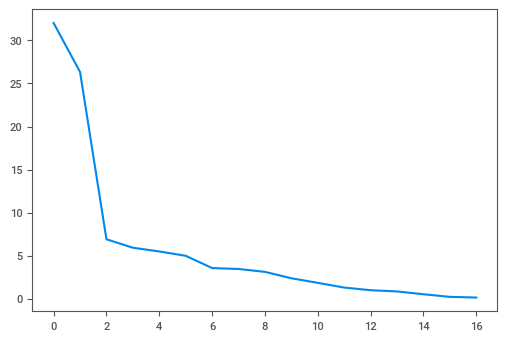

In [146]:
plt.plot(var_exp)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Variance Explained Ratio

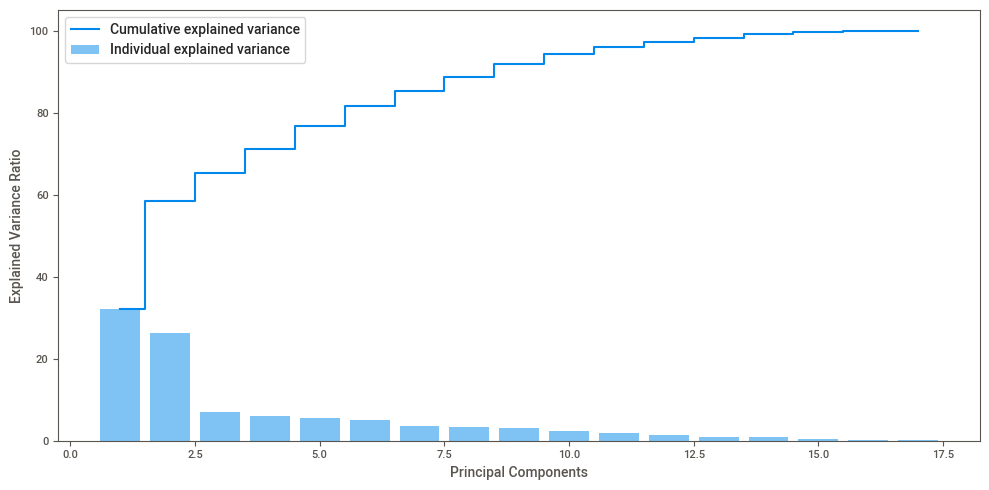

In [147]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   PCA using SKLEARN

In [151]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=data_new_with_outlier.columns.nunique())
data_reduced = pca.fit_transform(data_new_with_outlier)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [153]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [154]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [155]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [156]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8, 94.2, 96. ,
       97.3, 98.3, 99.1, 99.6, 99.8, 99.9])

## 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Forming Explicit form of Princial Components

In [158]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new_with_outlier))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
0   0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1   0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2  -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3   0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4   0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5  -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6  -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   
7  -0.103090 -0.056271  0.058662  -0.122678  -0.102492     0.078890   
8  -0.090227 -0.177865 -0.128561   0.341100   0.403712    -0.059442   
9   0.052510  0.041140  0.034488   0.064026   0.014549     0.020847   
10  0.043046 -0.058406 -0.069399  -0.008105  -0.273128    -0.081158   
11  0.024071 -0.145102  0.011143   0.038554  -0.089352     0.056177   
12  0.595831  0.292642 -0.444638   0.001023   0.021884    -0.523622   
13  0.080633  0.033467 -0.085697  -0.107828   0.151742    -0.056373   
14  0.133406 -0.145498  0.029590   0.697723  -0.617275     0.009916   
15  0.459139 -0.518569 -0.404318  -0.148739   0.051868     0.560363   
16  0.358970 -0.543427  0.609651  -0.144986   0.080348    -0.414705   

    P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  Terminal  \
0      0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1      0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2      0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3     -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4      0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5     -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6      0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   
7      0.570784  0.009846   -0.221453  0.213293 -0.232661 -0.077040 -0.012161   
8      0.560673 -0.004573    0.275023 -0.133663 -0.094469 -0.185182 -0.254938   
9     -0.223106  0.186675    0.298324 -0.082029  0.136028 -0.123452 -0.088578   
10     0.100693  0.143221   -0.359322  0.031940 -0.018578  0.040372 -0.058973   
11    -0.063536 -0.823444    0.354560 -0.028159 -0.039264  0.023222  0.016485   
12     0.125998 -0.141856   -0.069749  0.011438  0.039455  0.127696 -0.058313   
13     0.019286 -0.034012   -0.058429 -0.066849  0.027529 -0.691126  0.671009   
14     0.020952  0.038354    0.003402 -0.009439 -0.003090 -0.112056  0.158910   
15    -0.052731  0.101595   -0.025929  0.002883 -0.012890  0.029808 -0.027076   
16     0.009018  0.050900    0.001146  0.000773 -0.001114  0.013813  0.006209   

    S_F_Ratio  perc_alumni    Expend  Grad_Rate  
0   -0.176958     0.205082  0.318909   0.252316  
1    0.246665    -0.246595 -0.131690  -0.169241  
2   -0.289848    -0.146989  0.226744  -0.208065  
3   -0.161189     0.017314  0.079273   0.269129  
4   -0.079388    -0.216297  0.075958  -0.109268  
5    0.487046    -0.047340 -0.298119   0.216163  
6    0.219259     0.243321 -0.226584   0.559944  
7   -0.083605     0.678524 -0.054159  -0.005336  
8    0.274544    -0.255335 -0.049139   0.041904  
9    0.472045     0.423000  0.132286  -0.590271  
10   0.445001    -0.130728  0.692089   0.219839  
11  -0.011026     0.182661  0.325982   0.122107  
12  -0.017715     0.104088 -0.093746  -0.069197  
13   0.041374    -0.027154  0.073123   0.036477  
14  -0.020899    -0.008418 -0.227742  -0.003394  
15  -0.021248     0.003334 -0.043880  -0.005008  
16  -0.002222    -0.019187 -0.035310  -0.013071

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">   Factor Analysis

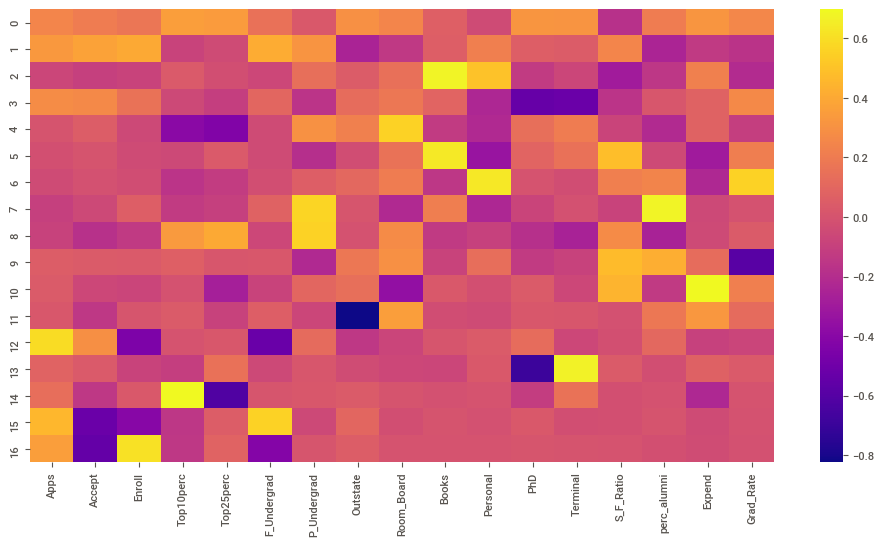

In [288]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)